## 다중회귀모델(Multiple Regression Model)
##### - 여러 개의 특성(독립변수 = 항목 = 칼럼 = 변수 = 퓨처)을 사용한 선형회귀
##### - 특성이 많을 수록, 복잡도가 높아 집니다.
##### - 1개의 특성으로는 선형회귀모델이 '직선'을 학습한다면,
##### - 2개이상의 특성으로는 선형회귀모델이 "평면"을 학습하게 됩니다.
#####
## 다중회귀모델 공식(방정식) - feature =  columns
##### y = a * 특성1 + b * 특성2 + c * 특성3.......+y절편

##### 데이터 준비하기
##### 구글드라이브 > dataset > 머신러닝 > data > 03_농어...csv

## <사용할 데이터>
##### -훈련데이터(독립변수) : 길이(length), 높이(height) , 두께(width)
##### -target데이터(종속변수) : 무게
##### -새로 추가할 데이터 : (길이 + 높이)= 면적
##### -모든 작업은 사이킷런에서 제공하는 함수 이용

## 특성공학
##### - 기존의 특성을 이용해서 " 새로운 특성(항목)"을 만들어내는 작업

In [1]:
# ### 데이터프레임을 2차원으로 바꾸기 ..
# # 데이터프레임은 2차원 ..
# # to_numpy()
# perch_full = df.to_numpy()
# perch_full

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./03_농어의_길이_높이_두께_데이터.csv',encoding = 'utf-8-sig')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [4]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [5]:
### 1. 훈련데이터와 테스트데이터 분리하기
from sklearn.model_selection import train_test_split

## 훈련데이터 / 테스트데이터 세트 생성하기
train_input, test_input, train_target,  test_target = train_test_split(df,perch_weight, test_size = 0.25, random_state = 42)

In [6]:
print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(42, 3)
(14, 3)
(42,)
(14,)


In [7]:
### 사이킷런 변환기 클래스
from sklearn.preprocessing import PolynomialFeatures

In [8]:
### 객체생성(모델)
poly = PolynomialFeatures(include_bias = False)

### 임의값 사용
temp_data = [[2,3]]

## 훈련시키기 :: 새롭게 만들 스스로 특성 조합 찾기
poly.fit(temp_data)

### 찾은 특성 조합으로 데이터 변환하기
print(poly.transform(temp_data))

###<변환기 특성 조합 생성 규칙>
# - 첫번째 나온 1의값 : y절편 값 (무조건 첨에 1이 나옵니다.)
# - 두번째-세번째 : 자기 자신의 값을 그대로 넣습니다.
# - 네번째 : 2의 값을 제곱
# - 다섯번째 : 2 * 3
# - 여섯번째 : 3의 제곱


### y절편 1의 값은 PolynomialFeatures 클래스에서 기본적으로
# 특성에 추가된 절편값을 무시해 버립니다.
# - 추가된 y절편 1은 무시해도 되는 값입니다.
# 보통 PolynomialFeatures 클래스 생성시에 제외시키는 속성을 사용합니다.
# - include_bias = False 옵션 사용하면 y절편값 제외 시킵니다.

[[2. 3. 4. 6. 9.]]


## 특성 만들기 : 사이킷런의 변환기
#### -사이킷런은 특성을 만들거나 전처리하기 위한 다양한 객체를 제공
#### -사이킷런에서 제공하는 이런 클래스들을 "변환기"라고 부릅니다
## <특성 생성 패키지>
##### - 사용되는 패키지 : sklearn.preprocessing
##### - 사용되는 클래스 : PolynomialFeatures
##### - 사용되는 함수 : fit(), transform(), fit_transforms()
##### - 특성 생성 시 사용하는 데이터는 train_input, test_input 2개
##### - 훈련에 영향을 미치는 특성(항목)을 스스로 찾아서 생성하는 것이 목적이기 때문에
##### - ...target데이터는 해당사항이 없습니다 (정답은 변경되면 안됩니다)

In [9]:
### train_input, test_input 데이터 변환하기...
# 변수명 : train_poly, test_poly 사용
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [10]:
test_poly = poly.transform(test_input)
print(test_poly.shape)

(14, 9)


In [11]:
train_input

,length,height,width
8,19.6,5.14,3.04
17,22.0,5.88,3.52
6,18.7,5.20,3.12
4,17.4,4.59,2.94
41,36.0,10.61,6.74
27,25.0,6.44,3.68
47,40.0,11.93,7.11
46,39.0,12.43,7.35
52,43.0,11.93,7.28
15,22.0,5.64,3.52


In [12]:
### 강사님 풀이
### 특성항목 조합패턴 : 기본적인 조합은 2차원을 사용합니다
# degree = 2

### train_input, test_input 데이터 변환하기 ...
## 객체생성(모델)
poly = PolynomialFeatures(degree = 5, include_bias = False)

### 훈련시키기 : 새롭게 만들 스스로 특성 조합 찾기
poly.fit(train_input)

### 찾은 특성 조합으로 데이터 변환하기
# - 훈련데이터 변환하기
train_poly = poly.transform(train_input)

# - 테스트데이터 변환하기
test_poly = poly.transform(test_input)

print(train_poly.shape , test_poly.shape)


(42, 55) (14, 55)


In [13]:
### 훈련모델이 사용된 조합의 패턴을 가지고 있습니다
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2',
       'length^3', 'length^2  height', 'length^2  width',
       'length  height^2', 'length  height  width', 'length  width^2',
       ' height^3', ' height^2  width', ' height  width^2', ' width^3',
       'length^4', 'length^3  height', 'length^3  width',
       'length^2  height^2', 'length^2  height  width',
       'length^2  width^2', 'length  height^3', 'length  height^2  width',
       'length  height  width^2', 'length  width^3', ' height^4',
       ' height^3  width', ' height^2  width^2', ' height  width^3',
       ' width^4', 'length^5', 'length^4  height', 'length^4  width',
       'length^3  height^2', 'length^3  height  width',
       'length^3  width^2', 'length^2  height^3',
       'length^2  height^2  width', 'length^2  height  width^2',
       'length^2  width^3', 'length  height^4', 'length  height^3  width',
       'length  height^2

In [14]:
poly.get_feature_names()

C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

## 다중회귀모델 훈련하기 : 훈련모델 생성

In [15]:
### 훈련데이터와 테스트데이터 결정값 확인까지 해주세요..

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print('훈련 = ', lr.score(train_poly, train_target))
print('테스트 = ', lr.score(test_poly, test_target))

훈련 =  0.9999999999997439
테스트 =  -144.40564427629454


In [17]:
### 훈련데이터 학습 다시 하기
lr.fit(train_poly, train_target)

print('훈련 = ', lr.score(train_poly, train_target))
print('테스트 = ', lr.score(test_poly, test_target))

훈련 =  0.9999999999997439
테스트 =  -144.40564427629454


### (해석)
##### - 테스트 평가결과는 매우 큰 음수값 발생
##### - 훈련 평과결과는 매우 아름답습니다.
##### - 이 모델 훈련결과가 좋을 수록 테스트결과가 안좋게 나오는 결과를 보일 수 있습니다train_scaled = train_scaled.reshape(-1,1)

### 릿지, 라쏘 => 과적합이 발생하는것을 방해해서 과적합을 방지하는 모델

## 과적합을 줄이는 방법 : 규제
##### -규제: 과대적합이 일어나지 않도록 제어하는 개념 ...
##### -계수(기울기 포함)의 값을 줄이는 방법을 규제라고 합니다.
##### -규제 개념이 적용된 모델 : 릿지(ridge)회귀모델, 라쏘(lasso)회귀모델
##### -주로 릿지(ridge) 모델을 선호하는 편입니다.
## <규제 순서>
##### 1. 정규화 : 스케일이 다른 항목들을 표준점수로 동일하게 표준화 합니다.
##### -- 표준점수는 사이킷런에서 제공하는 클래스가 있었습니다.
##### 2. 릿지 및 라쏘 모델 적용
## 릿지(ridge)
##### - 계수를 제공한 값을 기준으로 규제를 적용
##### - 사용패키지 : sklearn.linear_model
##### - 사용클래스(모델) : Ridge
##### - 훈련,평가,테스트 : 기존과 동일한 함수 사용
## 라쏘(lasso)
##### - 계수의 절대값을 기준으로 규제를 적용
##### - 사용패키지 : sklearn.linear_model
##### - 사용클래스 : Lasso
##### - 훈련,평가,테스트 : 기존과 동일한 함수 사용

In [72]:
### 정규화(또는 표준화)

### 사용패키지
from sklearn.preprocessing import StandardScaler
### 클래스(모델) 생성하기
ss = StandardScaler()
ss.fit(train_poly,train_target)

StandardScaler()

In [73]:
## 훈련데이터 표준점수로 변환하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

train_scaled
test_scaled

### 각 데이터는 55개씩...
# 평균 및 표준편차 확인하기
print(ss.mean_,ss.scale_)

[2.84452381e+01 8.04238095e+00 4.82047619e+00 8.85315000e+02
 2.53486881e+02 1.51959000e+02 7.29365000e+01 4.36999452e+01
 2.62868381e+01 2.97326070e+04 8.59817581e+03 5.15200651e+03
 2.49680043e+03 1.49567194e+03 8.99184494e+02 7.27945149e+02
 4.36019840e+02 2.62115117e+02 1.58141990e+02 1.05917983e+06
 3.08429517e+05 1.84644673e+05 9.01239554e+04 5.39478286e+04
 3.23998082e+04 2.64224658e+04 1.58167367e+04 9.49991053e+03
 5.72489005e+03 7.77162422e+03 4.65285399e+03 2.79521756e+03
 1.68494739e+03 1.01911272e+03 3.93876111e+07 1.15192532e+07
 6.88842737e+06 3.37865413e+06 2.02034307e+06 1.21184517e+06
 9.93774754e+05 5.94291271e+05 3.56516573e+05 2.14541208e+05
 2.93110780e+05 1.75313851e+05 1.05196649e+05 6.33244641e+04
 3.82394901e+04 8.66870097e+04 5.18625239e+04 3.11308026e+04
 1.87477065e+04 1.13270112e+04 6.86569419e+03] [8.72831196e+00 2.87343151e+00 1.74638123e+00 5.24782988e+02
 1.60836428e+02 9.64793789e+01 4.95165749e+01 2.97578956e+01
 1.81139412e+01 2.50155373e+04 7.49275

In [22]:
### 릿지모델과 라쏘모델을 이용해서
### 각각 모델에 대한 훈련/테스트 결정계수 확인
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [23]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print('훈련 : ' , ridge.score(train_scaled,train_target))
print('테스트 : ' , ridge.score(test_scaled,test_target))

훈련 :  0.9896101671037343
테스트 :  0.9790693977615391


In [24]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print('훈련 : ', lasso.score(train_scaled, train_target))
print('테스트 : ' ,lasso.score(test_scaled, test_target))      

훈련 :  0.989789897208096
테스트 :  0.9800593698421883


## 규제강도 조절하기 ...
##### - 릿지 및 라쏘 모델의 경우 규제에 대한 강도를 조절하는 속성이 있습니다.
##### - alpha 속성을 사용합니다.
##### - 규제강도 alpha 속성에 들어가는 값을 알려주는 라이브러리는 없습니다.
##### - 사람이 직접 넣어 주어야 합니다.
##### - 보통 모델 함수에 속성 중에 사람이 직접 값을 넣어주는 속성들을 "하이퍼파라미터"라고 합니다.
##### - 파라메터 또는 하이퍼파라미터... 라는 용어를 간혹 쓰시는 분들이 있습니다.

## <alpha 조절값 찾는 방법>
##### - 정해진 방법 없습니다.
##### - 일반적으로, 훈련데이터와 학습데이터로 각각 훈련모델을 생성한 후 평가를 통해
##### ... 결정계수 값을 이용해서 그래프를 그린 후에,
##### ... 훈련데이터와 테스트데이터의 결정계수 값이 가장 가까워지는 지점의 
##### ... x축의 값을 이용해서 alpha 값으로 결정합니다.

In [26]:
### alpha 강도 조절값 찾아보기
import matplotlib.pyplot as plt

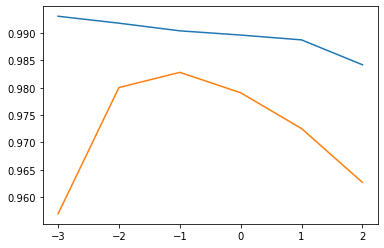

In [28]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score = []
# 테스트 시 발생하는 결정계수를 저장할 리스트
test_score = []

# 임의 alpha 값(x축으로 설정합니다.) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1 , 1 , 10 , 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list:
    # 릿지 모델
    ridge = Ridge(alpha = alpha) # alpha는 규제강도라는 속성이다
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
# 그래프로 시각화
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

## 테스트데이터가 떨어지는 부분이 과소적합
## 훈련데이터가 떨어지는 부분이 과소적합

In [31]:
# 릿지 모델
ridge = Ridge(alpha = 0.1) # alpha는 규제강도라는 속성이다
ridge.fit(train_scaled, train_target)
print('훈련 = ' , ridge.score(train_scaled, train_target))
print('테스트 = ' ,ridge.score(test_scaled, test_target))

훈련 =  0.9903815817570365
테스트 =  0.9827976465386884


C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

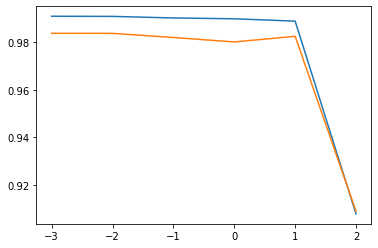

In [34]:
# 훈련시 발생하는 결정계수를 저장할 리스트
train_score = []
# 테스트 시 발생하는 결정계수를 저장할 리스트
test_score = []

# 임의 alpha 값(x축으로 설정합니다.) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1 , 1 , 10 , 100]

### 훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list:
    # 라쏘 모델
    lasso = Lasso(alpha = alpha) # alpha는 규제강도라는 속성이다
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    
# 그래프로 시각화
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

## 1이후부터 과소적합 발생

In [35]:
# 라쏘 모델
lasso = Lasso(alpha = 10) # alpha는 규제강도라는 속성이다
lasso.fit(train_scaled, train_target)
print('훈련 = ' , lasso.score(train_scaled, train_target))
print('테스트 = ' ,lasso.score(test_scaled, test_target))

훈련 =  0.9888067471131867
테스트 =  0.9824470598706695


In [37]:
# 릿지
# 훈련 =  0.9903815817570365
# 테스트 =  0.9827976465386884

# 라쏘
# 훈련 =  0.9888067471131867
# 테스트 =  0.9824470598706695

## 훈련데이터가 일단 높아야된다
## 결정계수 수치와 간격을 종합적으로 고려
## 훈련 - 테스트값이(차이)가 크면 고민

# 아까 규제강도를 정하기 전에는 라쏘가 선택되었지만
# alpha를 최적화 한 후 릿지가 더 합당하다 ==> 릿지로 결정

# 혼자 공부하는 머신러닝 및 딥러닝(정독하기 좋은 책)

In [38]:
# 로지스틱회귀(회귀+분류), 랜덤포레스트 ensemble ->분류할때 많이 쓴다
# 회귀분석시 sklearn.linear_model 자주 쓴다

## [문제]
##### - 테스트 데이터 : length=50, height = 16.49, width = 10.6
##### - 위 다중, 리지, 라쏘, 모두 예측해 보기..

In [86]:
### 객체생성(모델)
poly = PolynomialFeatures(degree = 5,include_bias = False)

### 임의값 사용
temp = [[50,16.49,10.6]]

## 훈련시키기 :: 새롭게 만들 스스로 특성 조합 찾기
poly.fit(train_input)

### 찾은 특성 조합으로 데이터 변환하기
print(poly.transform(temp))
temp_poly = poly.transform(temp)

[[5.00000000e+01 1.64900000e+01 1.06000000e+01 2.50000000e+03
  8.24500000e+02 5.30000000e+02 2.71920100e+02 1.74794000e+02
  1.12360000e+02 1.25000000e+05 4.12250000e+04 2.65000000e+04
  1.35960050e+04 8.73970000e+03 5.61800000e+03 4.48396245e+03
  2.88235306e+03 1.85281640e+03 1.19101600e+03 6.25000000e+06
  2.06125000e+06 1.32500000e+06 6.79800250e+05 4.36985000e+05
  2.80900000e+05 2.24198122e+05 1.44117653e+05 9.26408200e+04
  5.95508000e+04 7.39405408e+04 4.75300020e+04 3.05529424e+04
  1.96398538e+04 1.26247696e+04 3.12500000e+08 1.03062500e+08
  6.62500000e+07 3.39900125e+07 2.18492500e+07 1.40450000e+07
  1.12099061e+07 7.20588265e+06 4.63204100e+06 2.97754000e+06
  3.69702704e+06 2.37650010e+06 1.52764712e+06 9.81992692e+05
  6.31238480e+05 1.21927952e+06 7.83769732e+05 5.03818021e+05
  3.23861190e+05 2.08182451e+05 1.33822558e+05]]


C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [87]:
# 다중회귀모델
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
predict = lr.predict(temp_poly)
print('훈련 = ', lr.score(train_poly, train_target))
print('테스트 = ', lr.score(test_poly, test_target))

훈련 =  0.9999999999997439
테스트 =  -144.40564427629454


In [88]:
predict

array([-562042.17613728])

In [74]:
### 정규화(또는 표준화)

### 사용패키지
from sklearn.preprocessing import StandardScaler
### 클래스(모델) 생성하기
ss = StandardScaler()
ss.fit(train_poly,train_target)
## 훈련데이터 표준점수로 변환하기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
temp_scaled = ss.transform(temp_poly)

train_scaled
test_scaled
temp_scaled
### 각 데이터는 55개씩...
# 평균 및 표준편차 확인하기
print(ss.mean_,ss.scale_)

[2.84452381e+01 8.04238095e+00 4.82047619e+00 8.85315000e+02
 2.53486881e+02 1.51959000e+02 7.29365000e+01 4.36999452e+01
 2.62868381e+01 2.97326070e+04 8.59817581e+03 5.15200651e+03
 2.49680043e+03 1.49567194e+03 8.99184494e+02 7.27945149e+02
 4.36019840e+02 2.62115117e+02 1.58141990e+02 1.05917983e+06
 3.08429517e+05 1.84644673e+05 9.01239554e+04 5.39478286e+04
 3.23998082e+04 2.64224658e+04 1.58167367e+04 9.49991053e+03
 5.72489005e+03 7.77162422e+03 4.65285399e+03 2.79521756e+03
 1.68494739e+03 1.01911272e+03 3.93876111e+07 1.15192532e+07
 6.88842737e+06 3.37865413e+06 2.02034307e+06 1.21184517e+06
 9.93774754e+05 5.94291271e+05 3.56516573e+05 2.14541208e+05
 2.93110780e+05 1.75313851e+05 1.05196649e+05 6.33244641e+04
 3.82394901e+04 8.66870097e+04 5.18625239e+04 3.11308026e+04
 1.87477065e+04 1.13270112e+04 6.86569419e+03] [8.72831196e+00 2.87343151e+00 1.74638123e+00 5.24782988e+02
 1.60836428e+02 9.64793789e+01 4.95165749e+01 2.97578956e+01
 1.81139412e+01 2.50155373e+04 7.49275

In [89]:
ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, train_target)
pred = ridge.predict(temp_scaled)
print('훈련 : ' , ridge.score(train_scaled,train_target))
print('테스트 : ' , ridge.score(test_scaled,test_target))

훈련 :  0.988728468997471
테스트 :  0.9725329582461567


In [90]:
pred

array([2567.61387758])

In [91]:
# 라쏘 모델
lasso = Lasso(alpha = 10) # alpha는 규제강도라는 속성이다
lasso.fit(train_scaled, train_target)
pred = lasso.predict(temp_scaled)
print('훈련 = ' , lasso.score(train_scaled, train_target))
print('테스트 = ' ,lasso.score(test_scaled, test_target))

훈련 =  0.9888067471131867
테스트 =  0.9824470598706695


In [92]:
pred

array([2232.10145456])